# Import Packages

In [1]:
import os
import sys
import pandas as pd

from IPython.display import display

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from data.data_preprocessing import map_and_convert_categories
from utils.plotting import DataVisualiser
from utils.helpers import load_data, check_and_print_missing_value_counts

ModuleNotFoundError: No module named 'category_mappings'

# Load data

In [2]:
data = load_data("train.csv")

# Initial Exploration
## Shape and Structure

In [3]:
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dropping Unwanted Features
- id: This is just a unique identifier for each property in the dataset, which does not contribute to predicting sale price

In [4]:
data.drop(columns=['Id'], inplace=True)

## Data Types

In [5]:
pd.options.display.max_rows = None
display(data.dtypes.to_frame(name='DataType'))

,DataType
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


## Data Type Conversion
The following features will be converted to categorical types for improved interpretability and accurate analysis:
1. **MSSubClass:** Represents the building type, with each value corresponding to a specific category (e.g., 20 = 1-Story 1946 & newer, 30 = 1-Story 1945 & older). These numeric codes are inherently categorical and do not have any quantitative relationship
2. **OverallQual:** Rates the overall material and finish quality of the house on a scale from 1 (Very Poor) to 10 (Excellent). These values are categorical codes representing quality levels rather than numerical values with a mathematical relationship
3. **OverallCond:** Rates the overall condition of the house on a scale from 1 (Very Poor) to 10 (Excellent). Similar to OverallQual, these values are categorical codes indicating condition levels, not ordinal or quantitative data
4. **Other Categorical Columns:** Columns with abbreviations will be mapped to their corresponding full names (e.g., Ex to "Excellent", Gd to "Good") to improve clarity and interpretability in both analysis and visualizations

# Univariate Analysis

In [6]:
visualizer = DataVisualiser(data)

## MSSubClass
### Checking for missing values

In [7]:
check_and_print_missing_value_counts(data, 'MSSubClass')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [8]:
data['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

### Visualization

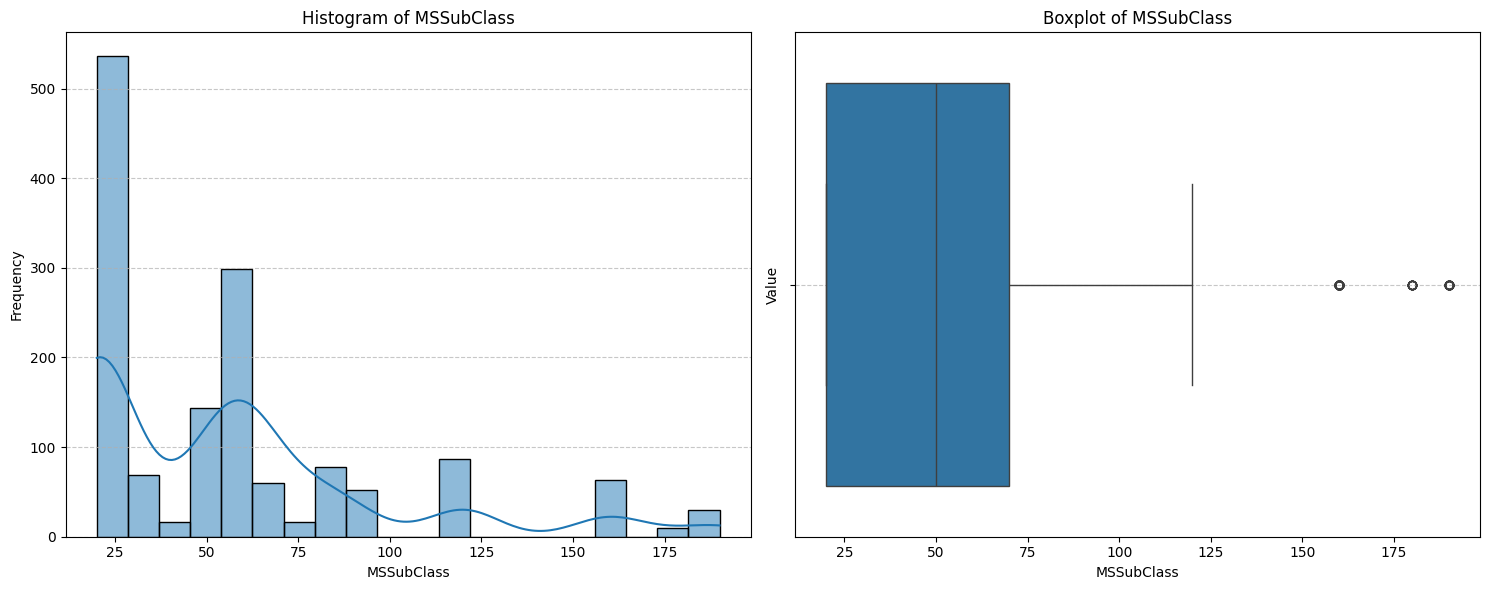

In [9]:
visualizer.plot('MSSubClass')

## MSZoning
### Checking for missing values

In [10]:
check_and_print_missing_value_counts(data, 'MSZoning')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [11]:
data['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

### Visualization

In [12]:
visualizer.plot('MSZoning')